# Gender Classification using InceptionResNetV2

### **Abhishek Chatterjee (abhishekchatterjeejit@gmail.com)**

The objective of this project is to correctly classify the gender of a person by just looking at his/her facial photograph. This is a supervised learning problem. A Deep Learning algorithm is specifically trained on a large dataset of female and male faces. After training, the model can be used for classifying new facial images.

* **1. Introduction**
* **2. Preparing the Environment**
  * 2.1 Installing dependencies
  * 2.2 Importing dependencies
  * 2.3 Loading the datasets
* **3. Data Visualization and Exploring the Dataset**
  * 3.1 Exploring the Dataset
  * 3.2 Visualizing the Dataset
* **4. Data Preprocessing**
* **5. CNN Modeling**
* **6. Final Model**
* **7. Evaluating the Model**
* **8. Conclusion**

# 1. Introduction

Classifying gender just by looking at a facial image for a computer is very hard and tricky. But with modern Machine Learning and Deep Learning algorithms, this tricky and hard job can be programmed. And in this project, I'll solve this challenging problem using Modern Deep Learning. 


Convolutional Neural Networks are very powerful and widely used in Computer Vision. For this project, CNN is perfect to use. I'll use  InceptionResNetV2 model created and developed by Google. The paper can be found [here](https://arxiv.org/pdf/1602.07261.pdf)


The dataset that I'll use for this project is a preprocessed IMDB WIKI dataset. Information about the dataset can be found [here](https://github.com/imdeepmind/processed-imdb-wiki-dataset)

# 2. Preparing the Environment

## 2.1 Installing dependencies

So this first thing is to install the dependencies. So first we will install all the dependencies using pip.

For this project, I'll use Python 3

In [1]:
# Check the version of python

!python --version

Python 3.6.7


In [2]:
# Let's install dependencies

!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn
!pip install tensorflow
!pip install keras

## 2.2 Importing dependencies

Now I'll import all the dependencies that I need for this project

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionResNetV2

Using TensorFlow backend.


## 2.3 Loading the dataset

The dataset is in my google drive. To load the data from google drive to google colab, we need to use mount the drive with google drive.

In [4]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Now google drive is mounted. To check that, go to the Files section in Colab and search for the folder "drive" (you may need to refresh).

Now let's read the dataset using the pandas read_csv method

In [0]:
data = pd.read_csv('drive/My Drive/datasets/wiki_0.csv')

# 3. Data Visualization and Exploring the Dataset

## 3.1 Exploring the Dataset

Data Visualization is one of the most important aspects of Machine Learning. By visualizing and exploring the dataset, we can understand the data.

This unuderstanding of the data helps us to solve the main problem.

So first let's explore and understand the data.

In [6]:
# Printing first 10 rows

data.head(10)

,Unnamed: 0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,pixel4096,dob,photo_taken,gender,name
0,0,64,65,70,50,177,122,92,78,90,...,37,39,39,45,48,43,1981-05-05,2009,male,Sami Jauhojärvi
1,1,143,155,157,165,162,175,166,165,169,...,95,66,58,61,69,54,1925-04-04,1964,male,Dettmar Cramer
2,2,38,54,54,46,51,34,37,25,35,...,115,115,115,115,115,115,1948-07-03,2008,male,Marc Okrand
3,3,47,47,47,47,47,47,47,47,45,...,144,142,142,147,153,156,1971-05-31,2012,female,Diana Damrau
4,4,197,210,218,215,220,206,190,165,143,...,64,48,53,62,69,56,1960-11-09,2012,female,Krista Tippett
5,5,209,210,176,119,95,87,85,82,83,...,30,25,31,34,33,35,1937-09-27,1971,male,Bernie Whitebear
6,6,70,77,59,75,120,168,196,204,211,...,247,240,232,192,159,92,1908-08-19,1950,male,Carl Greenberg
7,7,169,169,168,168,139,85,65,64,73,...,127,83,64,58,54,57,1933-06-12,1969,male,Eddie Adams
8,8,52,59,63,58,59,61,62,62,61,...,237,246,242,233,226,221,1987-05-16,2010,male,Viktor Pfeifer
9,9,114,118,142,161,161,163,167,172,162,...,92,120,85,89,75,64,1981-04-07,2006,female,Sharka Blue


In [7]:
# Printing last 10 rows

data.tail(10)

,Unnamed: 0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,pixel4096,dob,photo_taken,gender,name
36146,36146,43,39,34,38,32,38,38,43,54,...,224,219,215,230,212,227,1943-12-08,1966,male,Ramón Grosso
36147,36147,103,16,3,38,70,106,82,85,68,...,126,135,103,89,75,71,1943-01-24,1973,male,Manuel Velázquez
36148,36148,168,171,162,155,135,121,114,97,100,...,112,115,113,114,112,109,1939-07-31,1971,male,Ignacio Zoco
36149,36149,27,27,31,40,60,42,29,36,31,...,132,141,160,192,188,164,1938-12-28,1962,male,Pachín
36150,36150,226,222,225,229,231,222,221,170,80,...,180,171,167,145,167,217,1937-03-04,1962,male,José Araquistáin
36151,36151,50,51,53,51,53,53,54,54,54,...,117,121,118,147,170,154,1937-02-15,1968,male,Coen Moulijn
36152,36152,75,62,89,44,65,100,82,57,77,...,104,163,140,126,129,120,1943-11-01,1968,male,Theo van Duivenbode
36153,36153,34,30,33,39,65,58,47,31,28,...,129,134,115,203,197,201,1937-04-17,1963,male,Guus Haak
36154,36154,171,181,209,193,128,198,217,219,226,...,158,158,157,157,158,159,1972-12-27,2013,male,Michael Wiesinger
36155,36155,85,63,61,53,53,51,51,60,73,...,59,60,67,80,70,67,1954-06-11,2008,female,Greta Van Susteren


In [8]:
# Printing the shape of the dataset

data.shape

(36156, 4101)

In [9]:
# Printing the columns the dataset

data.columns

Index(['Unnamed: 0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel4091', 'pixel4092', 'pixel4093', 'pixel4094', 'pixel4095',
       'pixel4096', 'dob', 'photo_taken', 'gender', 'name'],
      dtype='object', length=4101)

This dataset has images of 64x64, that means a total of 4096 pixels. The columns "pixel1" to column "pixel4096" the main image.

The rest of columns are described as followers

The "dob" column contains the date of birth.
The "photo_taken" column contains the date when the photo was taken.

These two columns can be used to calculate the age of each model in the image. But for this project, the age-related information is not important so we can ignore these two columns.

Then the column "gender" contains information about the gender of each model. We need this information. This is our independent or target value.

And the "name" column contains the name of each model. We don't need this so we can ignore this information too.

## 3.2 Visualizing the Dataset

Now I'll use matplotlib for visualize the dataset

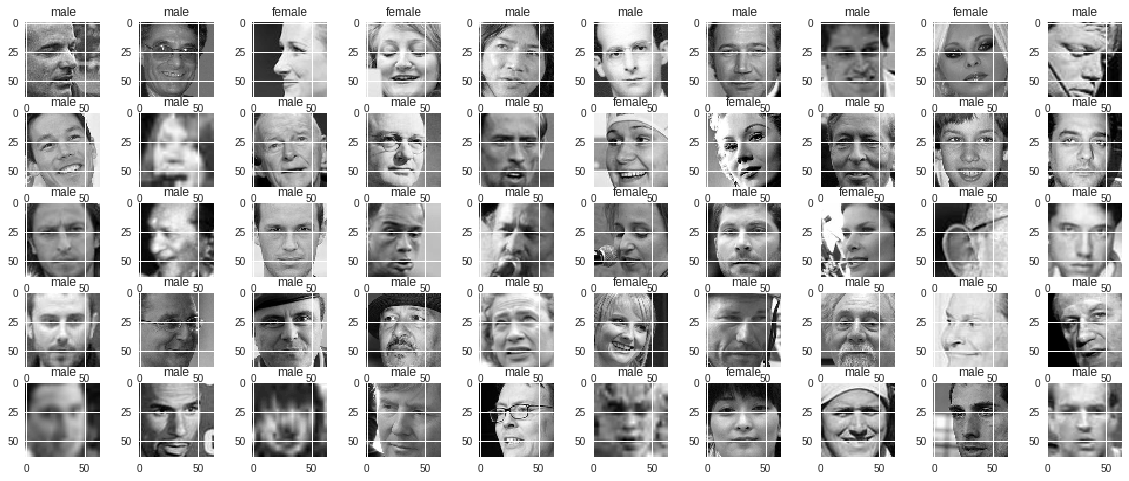

In [18]:
# Lets plot some of the images

w=64
h=64
fig=plt.figure(figsize=(20, 8))
columns = 10
rows = 5

snap = data.head(51)

X = snap.drop(['dob', 'photo_taken', 'name', 'gender', 'Unnamed: 0'], axis=1).values
y = snap['gender'].values

for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(X[i].reshape(w,h), cmap='gray')
    plt.title(y[i])
plt.show()

del snap, X, y

This plot shows the images 50 models with their gender labels. As we can see there are some images with no faces.

Now I'll plot how many  male and female images we have in the dataset.

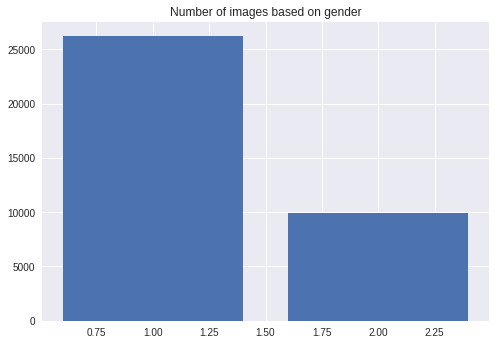

In [20]:
gender = data['gender'].values == 'male'
males = sum(gender)
females = len(data) - males

plt.bar([1,2],[males,females])
plt.title('Number of images based on gender')
plt.show()